In [1]:
import pandas as pd
from typing import NamedTuple,List,Dict
import random
import scipy.stats as st
import tqdm
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import json
from plot_tool import draw_vector
from sklearn.linear_model import LinearRegression
import math
from collections import defaultdict

In [2]:
class Rating(NamedTuple):
    user_id:str
    movie_id:str
    rating:float

In [3]:
def direction(w:np.array)->np.array:
    w_len = math.sqrt(np.dot(w,w))
    return [w_i/w_len for w_i in w]

In [4]:
movie_vectors = {}
user_vectors = {}
with open('../DataScience/movie_vectors.txt') as f:
  movie_vectors = json.load(f)
with open('../DataScience/user_vectors.txt') as f:
  user_vectors = json.load(f)
RATING = "../../Data/movies/u.data"
MOVIES = "../../Data/movies/u.item"
rating_df = pd.read_csv(RATING,delimiter="\t",header=None)
movies_df = pd.read_csv(MOVIES,delimiter="|",encoding='iso-8859-1',header=None)
movies = {movie_row[0]:movie_row[1] for i,movie_row in movies_df.iterrows()}
rating = [Rating(rating_row[0],rating_row[1],rating_row[2]) for i,rating_row in rating_df.iterrows()]

In [5]:
original_vector = [vector for vector in movie_vectors.values()]
means = np.array(original_vector).mean(axis=0)
means_vector = [[vector[0]-means[0],vector[1]-means[1]]for vector in original_vector]
vector_df = pd.DataFrame(data=original_vector,columns=["x","y"])
# vector_df["x_demean"] = vector_df[x]
mean = vector_df.mean(axis = 0)
mean_df = vector_df.sub([mean.x,mean.y])
vector_df['x_mean'] = mean_df.x
vector_df['y_mean'] = mean_df.y
# print(means_vector)
vector_df

,x,y,x_mean,y_mean
0,-1.788028,-0.833592,-0.412416,-0.117082
1,-1.812872,-0.328743,-0.437260,0.387767
2,-1.473209,-0.390312,-0.097597,0.326198
3,-1.514530,-1.062575,-0.138918,-0.346066
4,-1.759729,-0.238430,-0.384118,0.478080
...,...,...,...,...
1677,-0.638466,-1.007630,0.737146,-0.291120
1678,-1.083723,0.902289,0.291889,1.618799
1679,-0.687390,0.066324,0.688221,0.782834
1680,-1.575602,0.012220,-0.199991,0.728729


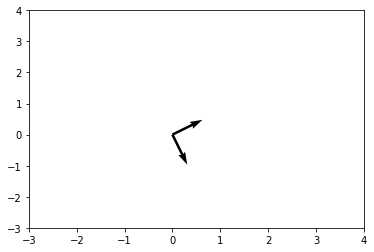

In [6]:
pca = PCA(n_components=1) #
pca_c2 = PCA(n_components=2)
pca.fit(means_vector)
pca_c2.fit(means_vector)
X_pca = pca.transform(means_vector)
X_new = pca.inverse_transform(X_pca)
components = pca_c2.components_
plt.xlim(-3, 4)
plt.ylim(-3, 4)
draw_vector(plt,components[0],np.array([[0],[0]]))
plt.xlim(-3, 4)
plt.ylim(-3, 4)
draw_vector(plt,components[1],np.array([[0],[0]]))
plt.show()

In [7]:
vector_df["x_new"] = X_new[:, 0]
vector_df["y_new"] = X_new[:, 1]

(-3.0, 4.0)

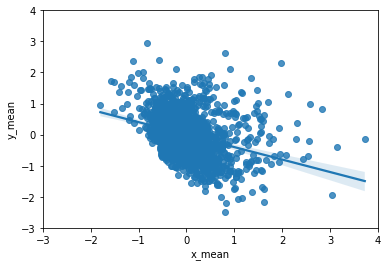

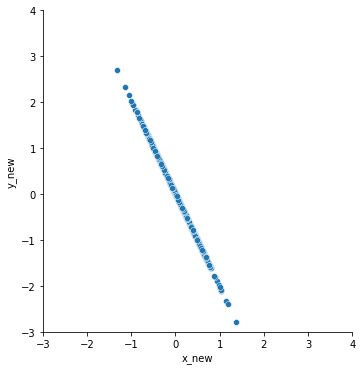

In [8]:
sns.regplot(x="x_mean",y="y_mean",data=vector_df)
plt.xlim(-3, 4)
plt.ylim(-3, 4)
sns.relplot(x="x_new",y="y_new",data=vector_df)
plt.xlim(-3, 4)
plt.ylim(-3, 4)

In [9]:
regr = LinearRegression()


x_arr_og = np.array(vector_df.x_mean)
x_arr = [[i] for i in x_arr_og]
y_arr = np.array(vector_df.y_mean)
regr.fit(x_arr, y_arr)
y_pred = regr.predict(x_arr)
x_arr
y_arr
# len(y_arr)

array([-0.11708247,  0.38776691,  0.3261978 , ...,  0.78283358,
        0.72872921, -0.03872257])

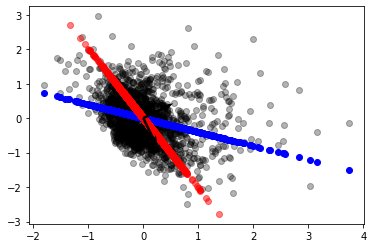

In [10]:
plt.scatter(vector_df.x_mean, vector_df.y_mean, color='black',alpha=0.3)
plt.scatter(x_arr, y_pred, color='blue')  #linear regression
plt.scatter(vector_df.x_new,vector_df.y_new, color='red',alpha=0.5) # pca
draw_vector(plt,components[0],np.array([[0],[0]]))
draw_vector(plt,components[1],np.array([[0],[0]]))
plt.show()
# y_pred
# x_arr
# draw_vector(plt,components,[[0,0],[0,0]])

In [11]:
ratings_by_movie = defaultdict(list)
for rate in rating:
    ratings_by_movie[rate.movie_id].append(rate.rating)
ratings_by_movie

defaultdict(list,
            {242: [3,
              3,
              5,
              3,
              5,
              4,
              5,
              4,
              4,
              4,
              2,
              5,
              5,
              2,
              5,
              5,
              4,
              4,
              4,
              4,
              4,
              3,
              4,
              5,
              4,
              5,
              5,
              5,
              2,
              4,
              3,
              5,
              1,
              5,
              5,
              3,
              5,
              1,
              4,
              5,
              3,
              4,
              5,
              4,
              1,
              4,
              5,
              5,
              3,
              4,
              4,
              4,
              5,
              5,
              4,
              4,
              5,
        

In [12]:
vectors = [
    (movie_id,
     sum(ratings_by_movie[int(movie_id)])/len(ratings_by_movie[int(movie_id)]),
     movies[int(movie_id)],
     pca.transform([vector])
     )
    for movie_id,vector in zip(movie_vectors.keys(),means_vector)
    if (len(ratings_by_movie[int(movie_id)]) != 0)
]
vectors

[('1', 3.8783185840707963, 'Toy Story (1995)', array([[-0.07742648]])),
 ('2', 3.2061068702290076, 'GoldenEye (1995)', array([[-0.54118723]])),
 ('3', 3.033333333333333, 'Four Rooms (1995)', array([[-0.33572031]])),
 ('4', 3.550239234449761, 'Get Shorty (1995)', array([[0.24891687]])),
 ('5', 3.302325581395349, 'Copycat (1995)', array([[-0.59867623]])),
 ('6',
  3.576923076923077,
  'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
  array([[-0.35778143]])),
 ('7', 3.798469387755102, 'Twelve Monkeys (1995)', array([[0.47316863]])),
 ('8', 3.9954337899543377, 'Babe (1995)', array([[0.13089398]])),
 ('9', 3.8963210702341136, 'Dead Man Walking (1995)', array([[0.73567677]])),
 ('10', 3.831460674157303, 'Richard III (1995)', array([[1.09156096]])),
 ('11', 3.847457627118644, 'Seven (Se7en) (1995)', array([[-0.00754891]])),
 ('12',
  4.385767790262173,
  'Usual Suspects, The (1995)',
  array([[0.47830704]])),
 ('13', 3.4184782608695654, 'Mighty Aphrodite (1995)', array([[0.8927951]]))

In [13]:
sorted(vectors,key=lambda v :v[-1][0])[:25]

[('296', 3.3333333333333335, 'Promesse, La (1996)', array([[-3.01555657]])),
 ('1600', 3.75, 'Guantanamera (1994)', array([[-2.6088022]])),
 ('976', 1.8333333333333333, 'Solo (1996)', array([[-2.39446787]])),
 ('1632',
  3.0,
  'Land and Freedom (Tierra y libertad) (1995)',
  array([[-2.25263917]])),
 ('1265', 3.0526315789473686, 'Star Maps (1997)', array([[-2.21836256]])),
 ('1261', 3.25, 'Run of the Country, The (1995)', array([[-2.20648429]])),
 ('1614', 3.0, 'Reluctant Debutante, The (1958)', array([[-2.17474034]])),
 ('1104',
  3.0,
  "C'est arrivé près de chez vous (1992)",
  array([[-2.16890483]])),
 ('1594', 4.5, 'Everest (1998)', array([[-2.05093356]])),
 ('1148', 3.3333333333333335, 'Tom & Viv (1994)', array([[-2.04149927]])),
 ('618', 3.611111111111111, 'Picnic (1955)', array([[-2.01690471]])),
 ('1667', 3.0, 'Next Step, The (1995)', array([[-1.9817265]])),
 ('1604', 4.0, 'He Walked by Night (1948)', array([[-1.98159344]])),
 ('899',
  3.4444444444444446,
  'Winter Guest, Th

In [14]:
sorted(vectors,key=lambda v :v[-1][0])[-25:]

[('1257', 1.75, 'Designated Mourner, The (1997)', array([[1.69671268]])),
 ('856', 3.8333333333333335, 'Night on Earth (1991)', array([[1.72234912]])),
 ('1630',
  3.0,
  'Silence of the Palace, The (Saimt el Qusur) (1994)',
  array([[1.72633593]])),
 ('1588', 2.0, 'Salut cousin! (1996)', array([[1.73141866]])),
 ('896',
  3.772727272727273,
  'Sweet Hereafter, The (1997)',
  array([[1.74165565]])),
 ('1498', 4.0, 'Farmer & Chase (1995)', array([[1.74405946]])),
 ('1216', 3.0, 'Kissed (1996)', array([[1.7561002]])),
 ('1358', 3.0, 'The Deadly Cure (1996)', array([[1.76194203]])),
 ('1579', 1.0, 'Baton Rouge (1988)', array([[1.77220474]])),
 ('1565', 1.0, 'Daens (1992)', array([[1.77295292]])),
 ('1155',
  3.3333333333333335,
  'Rendezvous in Paris (Rendez-vous de Paris, Les) (1995)',
  array([[1.78643934]])),
 ('1467', 5.0, 'Saint of Fort Washington, The (1993)', array([[1.79718004]])),
 ('677', 3.0, 'Fire on the Mountain (1996)', array([[1.80242158]])),
 ('1585', 2.5, 'American Dream 